### Import Libraries

In [1]:
import sys

sys.path.append('..')

In [2]:
import utils.data
import utils.trans
import utils.extract
import utils.visualize
import utils.features

In [3]:
from importlib import reload

In [4]:
reload(utils.data)
reload(utils.trans)
reload(utils.extract)
reload(utils.visualize)
reload(utils.features)

<module 'utils.features' from '..\\utils\\features.py'>

### Load Data

In [5]:
# file_dir = "..\\..\\datasets\\audio\\audio_speech_actors\\Actor_01"
# file_name = "03-01-01-01-01-01-01.wav"

file_dir = "..\\data\\self_recordings"
file_name = 'queen.wav'

file_path = file_dir + "\\" + file_name

In [6]:
x = {}

In [7]:
x['wave'] = utils.data.load_wave(file_path)

### Frequency Transforms

In [8]:
x['stft'] = utils.trans.apply(x['wave'], 
    func=utils.trans.wave_to_stft, 
    func_params=utils.extract.params['stft'])

x['mel'] = utils.trans.apply(x['wave'], 
    func=utils.trans.wave_to_mel, 
    func_params=utils.extract.params['mel'])

x['cqt'] = utils.trans.apply(x['wave'], 
    func=utils.trans.wave_to_cqt, 
    func_params=utils.extract.params['cqt'])

x['features'] = utils.features.signal_features(x)

..\utils\features.py:69: RuntimeWarning: invalid value encountered in subtract
  features[i] = (features[i] - np.mean(features[i]))/np.std(features[i])
C:\Users\Public\WPy64-3680\python-3.6.8.amd64\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [9]:
type(x['features'])

numpy.ndarray

In [10]:
utils.visualize.display_shapes(x)   

x:
--wave:
  --s: (440320,)
  --t: (440320,)
--stft:
  --s: (451, 1721)
  --c: (300, 1721)
  --f_phase: (451, 1721)
  --f: (451,)
  --t: (1721,)
--mel:
  --s: (236, 1721)
  --c: (254, 1721)
  --f: (236,)
  --t: (1721,)
--cqt:
  --s: (1295, 1721)
  --c: (300, 1721)
  --f_phase: (1295, 1721)
  --f: (1295,)
  --t: (1721,)
--features: (53, 1721)


### View Example

In [11]:
figsize = (15, 1.5)
# figsize = (15, 5)
cmap_spec = 'magma'

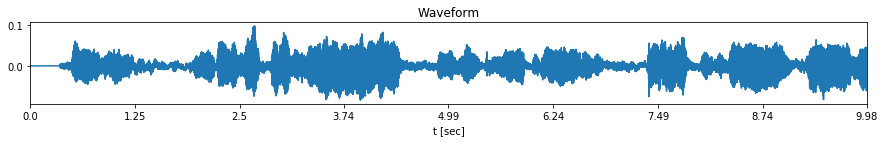

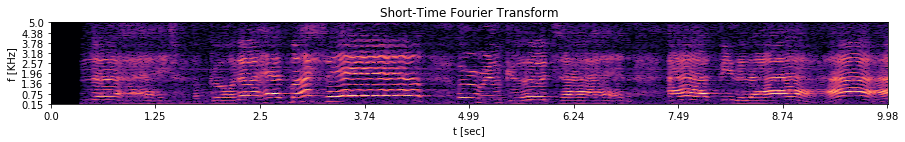

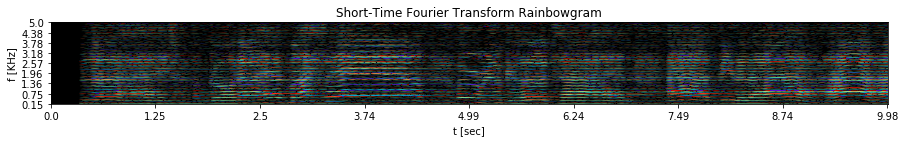

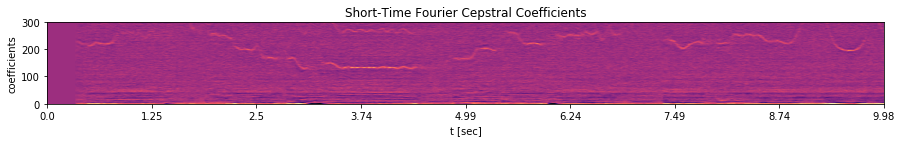

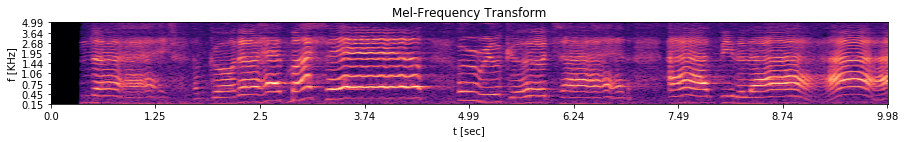

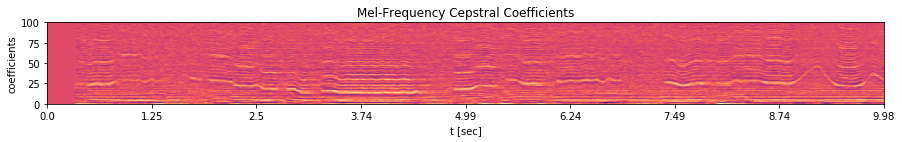

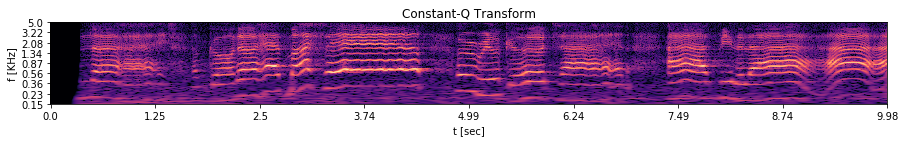

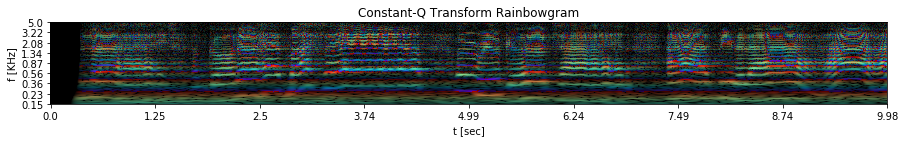

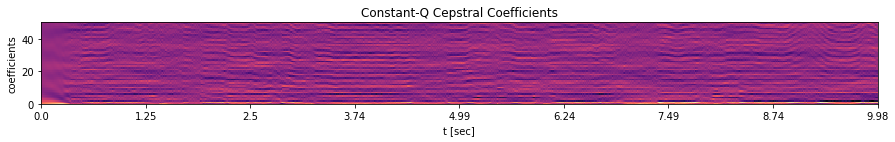

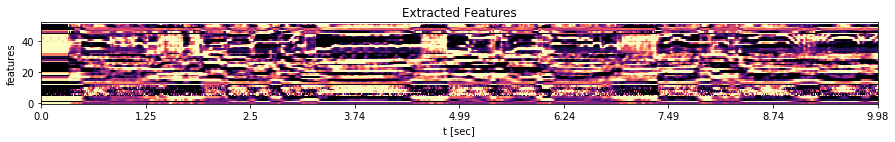

In [12]:
utils.visualize.display_all(x, figsize=figsize, cmap_spec=cmap_spec, 
                            display_rainbowgrams=True,
                            display_cepstrum=True)